In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from rflearn.env import WindGridWorld, CliffGridWorld
from rflearn.algo import MCIteration, TabularQValue, TabularPolicy
from rflearn.algo.td import Sarsa

In [5]:
env = CliffGridWorld(4, 12)
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0.1)
sarsa = Sarsa(env, qvalues, policy)
sarsa.fit(gamma=1, alpha=0.1)

In [16]:
sarsa.transform(100000)

100%|██████████| 100000/100000 [00:10<00:00, 9521.85it/s]


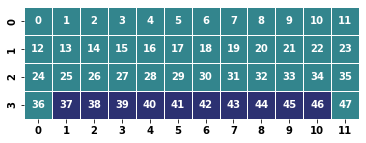

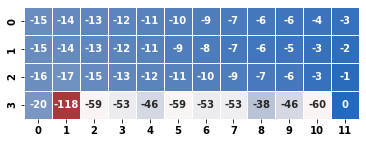

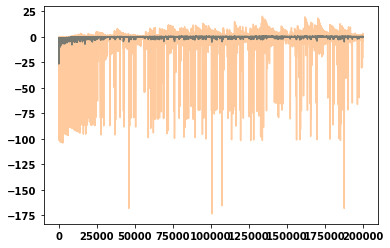

In [17]:
env.plot_grid('state')
plt.show()

v_vals = qvalues.get_all_values(policy)
sns.heatmap(v_vals.reshape(env.shape), square=True, cbar=False, cmap='vlag_r', linewidths=0.5, annot=True, fmt='.0f')
plt.show()

trace = pd.Series(sarsa.hist)
trace.ewm(halflife=25).mean().plot()
trace.plot(alpha=0.4)
plt.show()

# Windy Grid World

In [ ]:
env = WindGridWorld()
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0)
sarsa = Sarsa(env, qvalues, policy)
sarsa.fit(gamma=1, alpha=0.1)

In [ ]:
sarsa.transform(50000)

100%|██████████| 50000/50000 [00:04<00:00, 10164.74it/s]


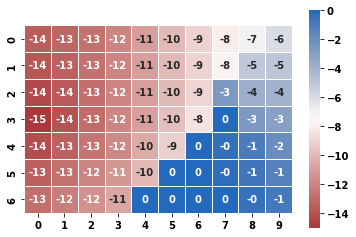

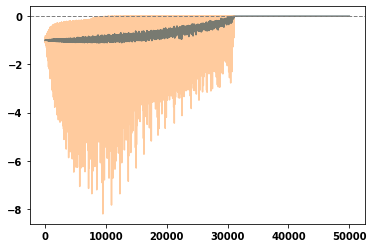

In [ ]:
v_vals = qvalues.get_all_values(policy).reshape(env.shape)
sns.heatmap(v_vals, linewidths=0.5, cmap='vlag_r', square=True, annot=True, fmt='.0f')
plt.show()

loss = pd.Series(sarsa.hist)
loss.ewm(halflife=25).mean().plot()
loss.plot(alpha=0.4)
plt.axhline(0, linestyle='--', color='grey',linewidth=1)
plt.show()